<font color='darkblue' size='6'> Fraud Detection using Automated Machine Learning (AutoML) </font>
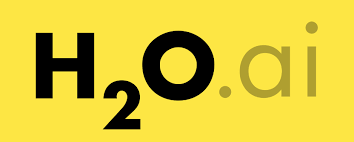
### Submitted to: <font color='darkred' size='4'> DR. Doaa Mahmoud </font>
### Facilitator: <font color='darkred' size='4'> Eng. Marwan Hatem </font>
### Presented by:  <font color='darkred' size='4'> Mohamed Anwar </font>

#### <font color='green' size='4'>Introduction :

In today's digital age, the concern surrounding financial fraud has escalated, impacting both businesses and individuals. The challenge of identifying fraudulent activities within the sea of legitimate transactions requires advanced techniques. This project delves into the world of fraud detection, with a focus on leveraging the power of Automated Machine Learning (AutoML) to significantly enhance accuracy and efficiency.

Financial fraud's consequences extend across financial institutions, businesses, and consumers. Traditional fraud detection methods often struggle to match the evolving strategies of fraudsters. Automated Machine Learning emerges as a promising solution, with the potential to swiftly adapt to new fraudulent techniques. Through automating feature selection, model building, hyperparameter tuning, and performance evaluation, AutoML simplifies the complex task of developing robust fraud detection models.

This project centers around a diverse feature set, including transaction amounts, timestamps, and relevant attributes, used to train and assess various machine learning models. By incorporating AutoML, the aim is to identify the most suitable model architecture, optimize hyperparameters, and enhance overall predictive accuracy in fraud detection.

The project's culmination involves analyzing the dataset and gaining insights from AutoML-driven models to comprehensively understand the landscape of fraud detection. The focus is not only on constructing accurate models but also on establishing a strategic foundation for organizations to effectively combat financial fraud.

The project harnesses a real-world credit card transactions dataset from Kaggle, utilizing AutoML's capabilities to contribute to the ongoing battle against financial fraud. This endeavor creates advanced, adaptable fraud detection mechanisms that promise a significant impact.

Throughout this notebook, we will explore stages of fraud detection. Beginning with data preprocessing, addressing class imbalance, and building machine learning models, the journey concludes with the integration of AutoML ( H2O ) to optimize model selection. Join us in exploring these cutting-edge techniques reshaping fraud detection in the digital age.

Let's embark on this transformative journey together!


In [3]:
import os


import numpy as np 
import pandas as pd 


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


/kaggle/input/creditcardfraud/creditcard.csv


In [4]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.duplicated().sum()


1081

In [7]:
df.drop_duplicates(inplace = True)


<Axes: xlabel='Class', ylabel='count'>

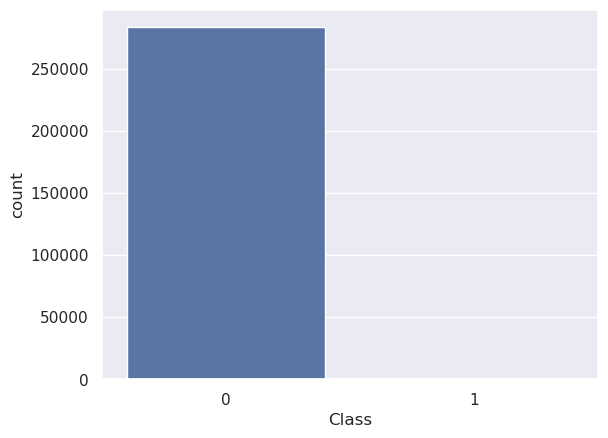

In [8]:
sns.set()
sns.countplot(data=df , x='Class')

In [9]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

# imbalanced dataset

# 1- Oversampling 

In [10]:
from sklearn.utils import resample
df_majority = df[(df['Class']==0)] 
df_minority =  df[(df['Class']==1)] 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 283253, # to match majority class
                                 random_state=42)  # reproducible results
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

<Axes: xlabel='Class', ylabel='count'>

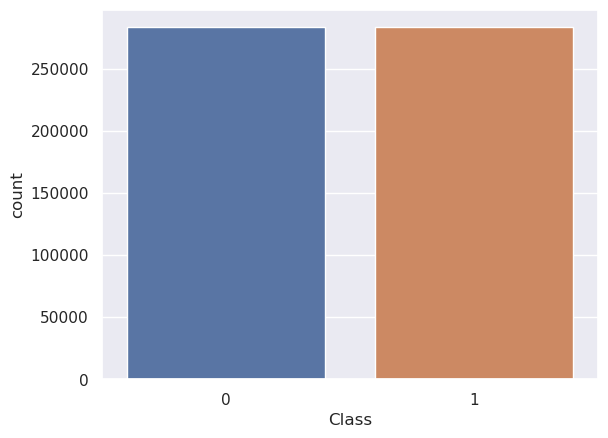

In [11]:
sns.set()
sns.countplot(data=df_upsampled , x='Class')

# 2- Random Under-sampling 

In [12]:
# class count
class_count_0, class_count_1 = df['Class'].value_counts()

# Separate class
class_0 = df[df['Class'] == 0]
class_1 = df[df['Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (283253, 31)
class 1: (473, 31)


total class of 1 and0: 0    473
1    473
Name: Class, dtype: int64


<Axes: title={'center': 'count (target)'}>

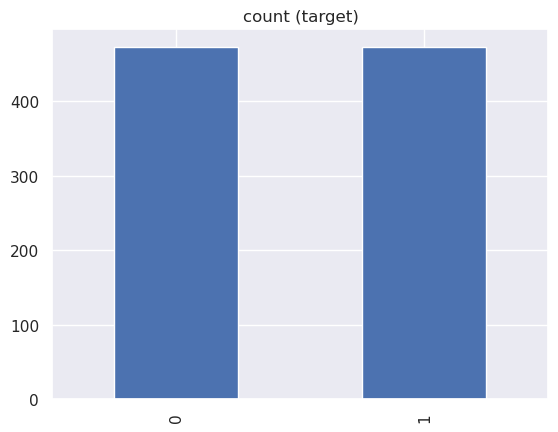

In [13]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['Class'].value_counts())# plot the count after under-sampeling
test_under['Class'].value_counts().plot(kind='bar', title='count (target)')

# Random Undersampling with imblearn 


In [14]:
X = df.drop('Class', axis=1)  # Features
Y = df['Class']  # Target variable


In [15]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, Y)

print('original dataset shape:', Counter(Y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 283253, 1: 473})
Resample dataset shape Counter({0: 473, 1: 473})


# Modeling 

In [16]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler


In [17]:

scaler = RobustScaler()


In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.25, random_state=42)

In [19]:
X_train_Scaled=scaler.fit_transform(X_train)

In [20]:
X_test_Scaled=scaler.fit_transform(X_test)

# XGboost 

In [21]:
from xgboost import XGBClassifier 

In [22]:
xgb= XGBClassifier(n_estimators=10,max_depth=12,learning_rate=.1)

In [23]:
xgb.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [24]:
print (xgb.score(X_train , y_train))
print (xgb.score(X_test , y_test))

0.9844851904090268
0.9113924050632911


# Adaboost 

In [25]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier( n_estimators=10, learning_rate=0.1)


In [26]:
ada.fit(X_train , y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=10)

In [27]:
print (ada.score(X_train , y_train))
print (ada.score(X_test , y_test))

0.9337094499294781
0.919831223628692


# Voting 

In [28]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import VotingClassifier

In [29]:
clf1= LogisticRegression()
clf2= AdaBoostClassifier( n_estimators=5, learning_rate=0.1)
clf3= XGBClassifier(n_estimators=5,max_depth=4,learning_rate=.1)

In [30]:
v_clf=VotingClassifier(estimators=[("LOG",clf1),("Ada",clf2),('xgb',clf3)],voting='hard')

In [31]:
v_clf=VotingClassifier(estimators=[("LOG",clf1),("Ada",clf2),('xgb',clf3)],voting='hard')

In [32]:
v_clf.fit(X_train , y_train)

VotingClassifier(estimators=[('LOG', LogisticRegression()),
                             ('Ada',
                              AdaBoostClassifier(learning_rate=0.1,
                                                 n_estimators=5)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=5, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [33]:
print (v_clf.score(X_train , y_train))
print (v_clf.score(X_test , y_test))

0.9506346967559943
0.919831223628692


# modeling for oversampled dataset 

In [34]:
X = df_upsampled.drop('Class', axis=1)  # Features
Y = df_upsampled['Class']  # Target variable


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [36]:
X_train_Scaled=scaler.fit_transform(X_train)

In [37]:
X_test_Scaled=scaler.fit_transform(X_test)

In [38]:
X_train.shape

(424879, 30)

# XGboost 

In [39]:
from xgboost import XGBClassifier 

In [40]:
xgb= XGBClassifier(n_estimators=5,max_depth=10,learning_rate=.1)

In [41]:
xgb.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [42]:
print (xgb.score(X_train , y_train))
print (xgb.score(X_test , y_test))

0.9980465026513431
0.9981077054516441


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier( n_estimators=10, learning_rate=0.1)


In [44]:
ada.fit(X_train , y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=10)

In [45]:
print (ada.score(X_train , y_train))
print (ada.score(X_test , y_test))

0.9284478639800978
0.9273231799021373


# Voting

In [46]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import VotingClassifier

In [47]:
clf1= LogisticRegression()
clf2= AdaBoostClassifier( n_estimators=5, learning_rate=0.1)
clf3= XGBClassifier(n_estimators=5,max_depth=4,learning_rate=.1)

In [48]:
v_clf=VotingClassifier(estimators=[("LOG",clf1),("Ada",clf2),('xgb',clf3)],voting='hard')

In [49]:
v_clf.fit(X_train , y_train)

VotingClassifier(estimators=[('LOG', LogisticRegression()),
                             ('Ada',
                              AdaBoostClassifier(learning_rate=0.1,
                                                 n_estimators=5)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=5, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [50]:
print (v_clf.score(X_train , y_train))
print (v_clf.score(X_test , y_test))

0.9433932955029549
0.9430687651365912


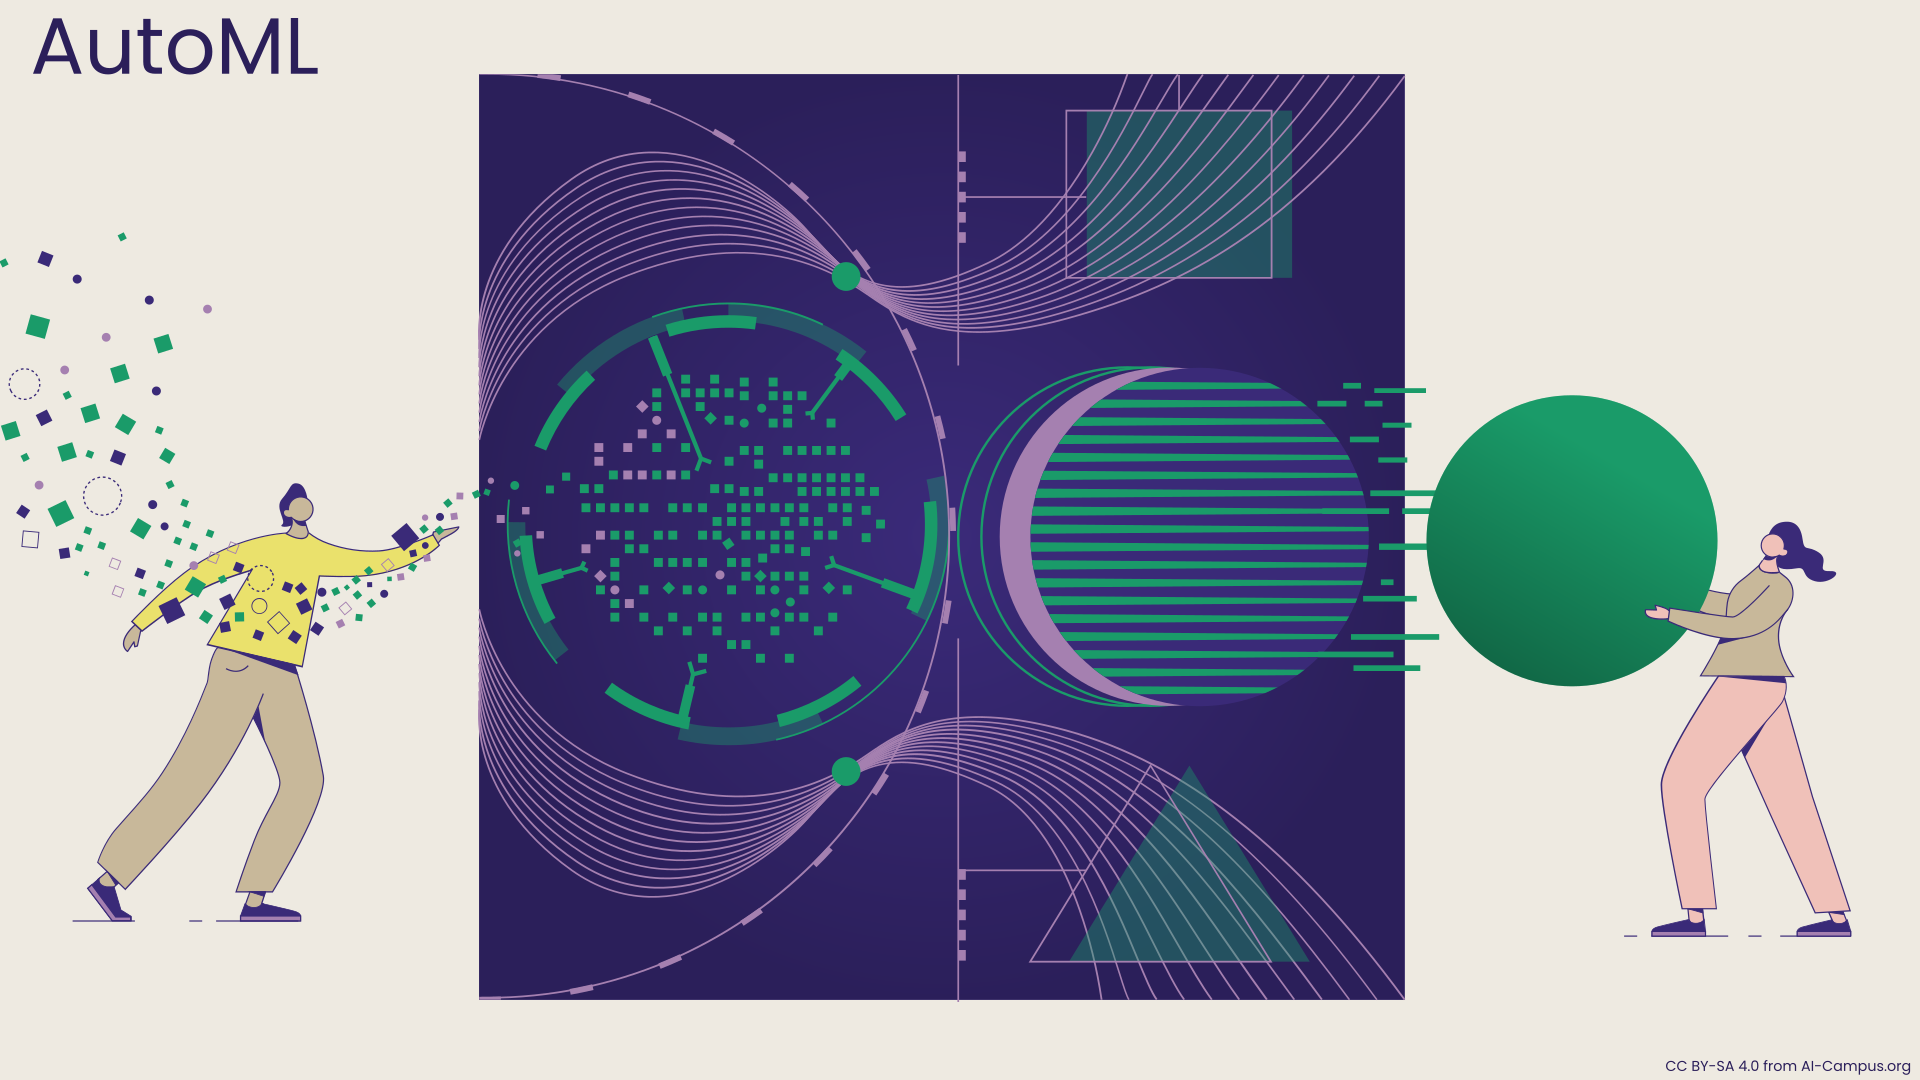

# What is AutoML?
Automated Machine Learning provides methods and processes to make Machine Learning available for non-Machine Learning experts, to improve efficiency of Machine Learning and to accelerate research on Machine Learning.

Machine learning (ML) has achieved considerable successes in recent years and an ever-growing number of disciplines rely on it. However, this success crucially relies on human machine learning experts to perform the following tasks:

- Preprocess and clean the data.
- Select and construct appropriate features.
- Select an appropriate model family.
- Optimize model hyperparameters.
- Design the topology of neural networks (if deep learning is used).
- Postprocess machine learning models.
- Critically analyze the results obtained.


 As the complexity of these tasks is often beyond non-ML-experts, the rapid growth of machine learning applications has created a demand for off-the-shelf machine learning methods that can be used easily and without expert knowledge. We call the resulting research area that targets progressive automation of machine learning AutoML.

# How does the AutoML process work?
AutoML is typically a platform or open source library that simplifies each step in the machine learning process, from handling a raw data set to deploying a practical ML model. In traditional machine learning, models are developed by hand, and each step in the process must be handled separately.

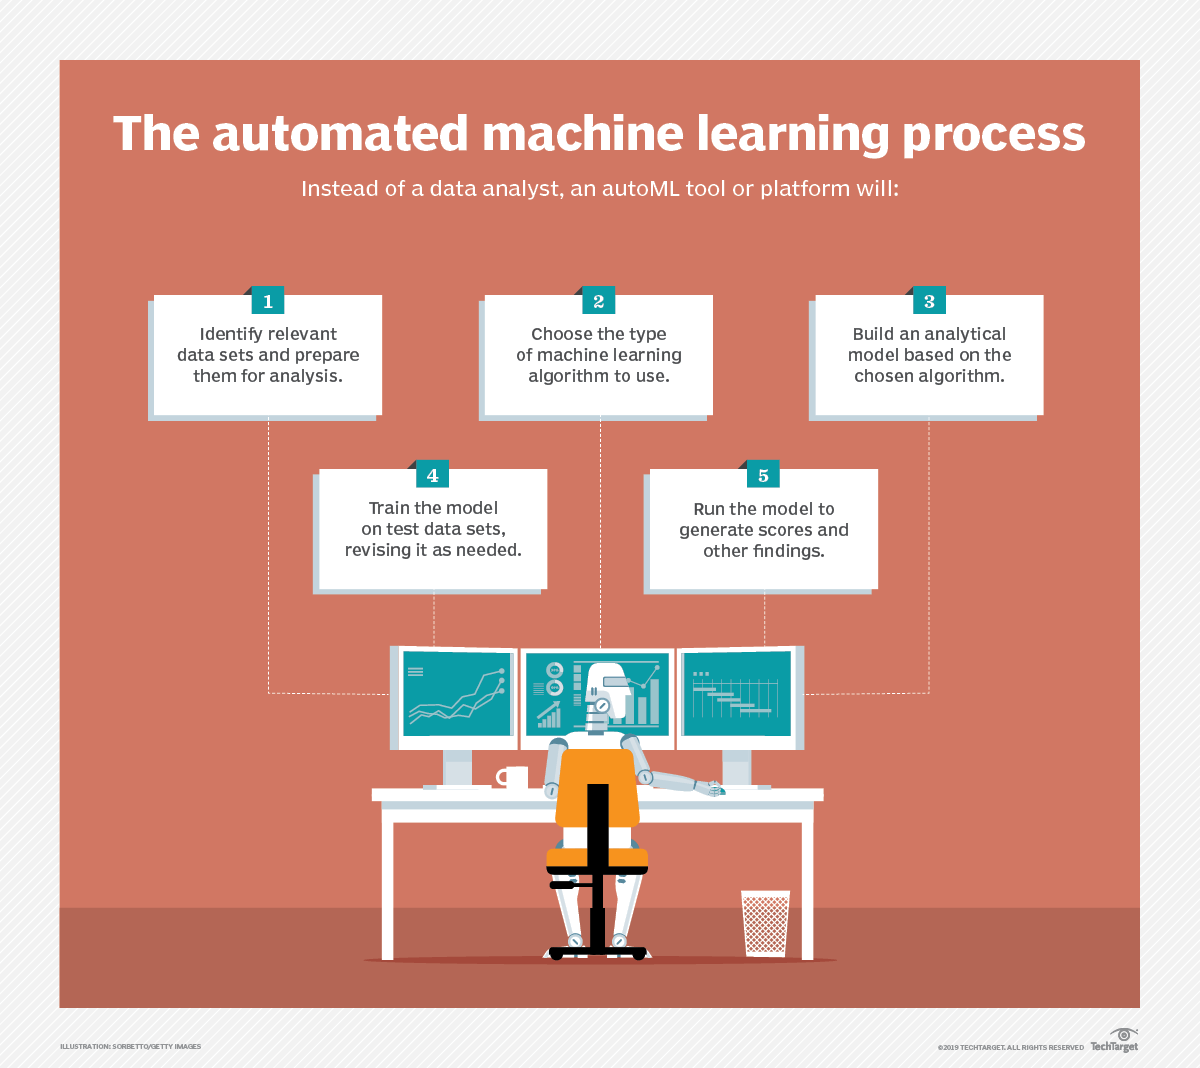

# AutoML tool features
The following are some popular AutoML platforms:

- Auto Sklearn: AutoSklearn is aN open-source AutoML framework that builds on the well-known scikit-learn library. It offers a simple interface for automating the process of creating machine learning models. AutoSklearn searches for the optimum model architecture, hyperparameters, and preprocessing procedures using a combination of Bayesian optimization and meta-learning.
- Google AutoML: Google Cloud AutoML offers a set of AutoML services for applications such as image recognition, natural language processing, and tabular data analysis. It provides a simple interface for creating and deploying bespoke machine-learning models. Google has also a Google AutoML Tables, which is a specialized AutoML tool for tabular data processing. It allows users to create and deploy machine learning models for applications like classification, regression, and time series forecasting that are specially optimized for tabular datasets.
- H2O.ai: H2O.ai provides H2O Driverless AI, an AutoML platform that automates the whole machine learning workflow. It consists of data preparation, feature engineering, model selection, and hyperparameter tuning. It can handle both structured and unstructured data.
- Microsoft Azure AutoML: The Microsoft Azure machine learning platform includes Azure AutoML. It supports AutoML for applications including classification, regression, and time series forecasting. It has a simple UI and works nicely with other Azure services.
- Databricks AutoML: Databricks AutoML is a Databricks AutoML utility that simplifies the process of developing machine learning models on huge datasets. It can handle a variety of tasks and offers an interactive environment for model building and assessment.
- TIBCO Data Science: TIBCO Data Science is a machine learning (ML) platform that allows users to create, deploy, and manage machine learning models. It automates many steps of the machine learning process and includes collaboration features for team-based development.
- AutoKeras: AutoKeras is an open-source AutoML package based on Keras and TensorFlow. It provides an easy-to-use interface for automating the process of generating deep learning models. AutoKeras offers image classification, regression, and text classification, among other things. It makes use of neural architecture search (NAS) to find the optimum neural network architecture and hyperparameters for a given dataset. AutoKeras automates model construction by managing architectural design, hyperparameter tuning, and model training.
> - Auto-PyTorch: Auto-PyTorch is another open-source AutoML package that was created primarily to automate the process of generating deep-learning models using PyTorch. It offers a user-friendly interface for automated architectural search and hyperparameter optimization. To discover the optimum model architecture and hyperparameters, Auto-PyTorch uses Bayesian optimization and combines it with ensemble selection. It can perform image classification, tabular data classification, and time series forecasting, among other things. Auto-PyTorch allows users to focus on high-level problem formulation while it handles the model search and optimization processes.


Auto-sklearn and Azure are generally considered cheaper because they are usually less resource-intensive than the other two platforms. They rely strongly on known architectures and data they've already seen, meaning that they don't need the whole data set to work. They use classification and regression techniques to do this.

# Importing and Initializing AutoML

In [63]:

import h2o
from h2o.automl import H2OAutoML

h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpl1cukehu
  JVM stdout: /tmp/tmpl1cukehu/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpl1cukehu/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,2 months and 10 days
H2O_cluster_name:,H2O_from_python_unknownUser_71hfe8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.500 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


# Loading dataset into AutoML

In [64]:
h2o_df = h2o.H2OFrame(df)
train, valid, test = h2o_df.split_frame(ratios=[0.6, 0.2], seed=42)  # 60% train, 20% validation, 20% test


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [65]:
# Define Features and Target
X = train.columns
y = "Class"
X.remove(y)
X.remove('Time')


# Setting the response column as factor for binary classification

In [67]:
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Running AutoML

In [68]:
# Run AutoML
aml = H2OAutoML(max_runtime_secs=3600)  # Set the maximum runtime in seconds
aml.train(x=X, y=y, training_frame=train, validation_frame=valid)


AutoML progress: |
22:33:14.491: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_2_20230830_223314_model_2


Model Summary: 
    number_of_trees
--  -----------------
    170

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.00034304061579801346
RMSE: 0.018521355668471285
LogLoss: 0.0019368995358972246
Mean Per-Class Error: 0.09311519287774943
AUC: 0.9965855607409548
AUCPR: 0.8943767662000252
Gini: 0.9931711214819097

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6652354001998901
       0       1    Error    Rate
-----  ------  ---  -------  ---------------
0      170287  4    0        (4.0/170291.0)
1      54      236  0.1862   (54.0/290.0)
Total  170341  240  0.0003   (58.0/170581.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.665235     0.890566  127
max f2                       0.299602     0.850316  147
max f0point5                 0.665235     0.944     127
max accuracy                 0.665235     0.99966   127
max precision                0.995254     1         0
max recall                   0.000223522  1         380
max specificity              0.995254     1         0
max absolute_mcc             0.665235     0.894399  127
max min_per_class_accuracy   0.00156808   0.968966  337
max mean_per_class_accuracy  0.0018741    0.972282  332
max tns                      0.995254     170291    0
max fns                      0.995254     289       0
max fps                      1.75865e-05  170291    399
max tps                      0.000223522  290       380
max tnr                      0.995254     1         0
max fnr                      0.995254     0.996552  0
max fpr                      1.75865e-05  1         399
max tpr                      0.000223522  1         380

Gains/Lift Table: Avg response rate:  0.17 %, avg score:  0.17 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100011                   0.00362791         93.0931    93.0931            0.158265         0.14901      0.158265                    0.14901             0.931034        0.931034                   9209.31   9209.31            0.922602
2        0.0200022                   0.00202008         2.41352    47.7533            0.00410317       0.00268316   0.0811841                   0.0758467           0.0241379       0.955172                   141.352   4675.33            0.936763
3        0.0300033                   0.00146208         1.37916    32.2953            0.00234467       0.00171548   0.0549043                   0.0511363           0.0137931       0.968966                   37.9157   3129.53            0.940561
4        0.0400045                   0.00115023         0.344789   24.3076            0.000586166      0.00129447   0.0413247                   0.0386758           0.00344828      0.972414                   -65.5211  2330.76            0.933997
5        0.0500056                   0.000946626        0.689578   19.584             0.00117233       0.00103952   0.0332943                   0.0311486           0.00689655      0.97931                    -31.0422  1858.4             0.930887
6        0.100005                    0.000510281        0.275864   9.93051            0.000468988      0.00068584   0.0168826                   0.0159181           0.0137931       0.993103                   -72.4136  893.051            0.894619
7        0.150017                    0.00034

# <font color='green' size='4'>Conclusion

In this project, we started by importing necessary libraries and loading the credit card fraud dataset. The dataset was examined for missing values and duplicates, which were then removed to ensure data quality. The class distribution was visualized, revealing an imbalanced dataset with a small number of fraudulent transactions.

To address the class imbalance, two approaches were employed: oversampling and random undersampling. These techniques aimed to balance the class distribution by either increasing the number of minority class samples or reducing the number of majority class samples. Additionally, the imbalanced-learn library was used to perform random undersampling for further comparison.

Subsequently, the data was preprocessed using RobustScaler to ensure that features were on the same scale, followed by the construction of multiple machine learning models. The models utilized in this project included XGBoost, AdaBoost, and a Voting Classifier consisting of logistic regression, AdaBoost, and XGBoost.

For each model, performance metrics such as training and testing accuracy were calculated. The project also explored AutoML (Automated Machine Learning) as a powerful tool for simplifying the machine learning process. AutoML platforms like H2O.ai were introduced, and their capabilities were demonstrated by loading the dataset, defining features and the target variable, and running AutoML to automatically search for the best-performing machine learning model.

In conclusion, this project showcases various techniques for handling imbalanced datasets, building machine learning models, and utilizing AutoML for automated model selection and evaluation. By employing these techniques, it is possible to achieve effective fraud detection while considering class imbalance and optimizing model performance.

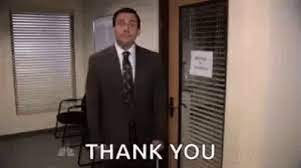